## Linear Regression on Boston Housing Dataset using Tensorflow 


**Tensorflow APIs**
-  In low level api we Build the architecture and perform the optimization of the model from scratch. It is complicated to do so for a beginner. 

- Then we have the High-level API in which we just Define the algorithm. It is easy and user-friendly. TensorFlow provides a toolbox called estimator to construct, train, evaluate and make a prediction. 

**Linear Regression** is an approach in statistics for modelling relationships between two variables.

<img src=img0.png>

We can see a linear relation above.

A linear regression is evaluated with an equation: $y = {\beta} + {\alpha} X + \epsilon $ (One dependant variable)

Now here  Beta is the bias. i.e. if x=0, y=$\beta$. Alpha is the weight associated to x and Epsilon is the residual or the error of the model, It includes what the model cannot learn from the data. 

Now Imagine we fit the model and we find the following solution for: 

 $\beta= 3.8$ and $\alpha = 2.78$

We can substitute those numbers in the equation and it becomes: y= 3.8 + 2.78x 

<img src=img1.png>

Linear regression compares the change of variable y for a change in x.

Let's see an example. Imagine we want to predict the sales of an ice cream shop. The dataset contains different information such as the weather (i.e rainy, sunny, cloudy), customer informations (i.e salary, gender, marital status) 

If you use linear regression, you can write this equation: 

$sales = {\beta} + {\alpha_{1}} weather + {\alpha_{2}} salary + {\alpha_{3}} gender + {\alpha_{4}} marital + \epsilon $

Linear Regression algorithm will find the best solution for the weights; it means it will try to minimize the cost (the difference between the fitted line and the data points) (We start with random initial values). (See image)

We can compute the error, that is noted by epsilon of the model, which is the difference between the predicted value and the real value.

Our goal is to minimize the square of the error. The algorithm computes the mean of the square error. And this step is called minimization of the error. For linear regression this error is called the **Mean Square Error**, also called MSE. Mathematically, it is: 

$MSE(X) = \frac{1}{m} {\sum \limits _{i=1} ^{m}} ({\theta^{T}}x^{i}-y^{i})^2 $

The goal is to find the best ${\theta}$  that minimize the MSE.

If the average error is large, it means the model performs poorly and the weights are not chosen properly. To correct the weights, you need to use an optimizer. The traditional optimizer is called Gradient Descent. 

The **Gradient Descent** takes the derivative and decreases or increases the weight. If the derivative is positive, the weight is decreased. If the derivative is negative, the weight increases. The model will update the weights and recompute the error. This process is repeated until the error does not change anymore. Each process is called an iteration. Besides, the gradients are multiplied by a learning rate and the learning rate indicates the speed of learning. 

If the learning rate is too small, it will take very long time for the algorithm to converge (i.e requires lots of iterations). If the learning rate is too high, the algorithm might never converge. 

<img src=img3.png>

<img src=img6.png height=600 width=600>



So, you can see from the aboce image, the model repeats the process about 20 times before to find a stable value for the weights, and then it reaches the lowest error. 

Note that, the error is not equal to zero but stabilizes around y=2. It means, the model makes a typical error of 2. If you want to reduce the error, you need to add more information to the model such as more variables or use different estimators. 

The final weights are 3.8 and 2.78. In the below gif we see how the gradient descent optimize the loss function to find this weights 

<img src=img4.gif height=400 width=400>




In [1]:
#Normally we have to go through a tedious process to fit linear regression to this 
#Let's see how tensorflow's high level api can help us out
import pandas as pd
import numpy as np
import tensorflow as tf
import itertools
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the TensorBoard notebook extension
%load_ext tensorboard

In [2]:
#read the csv files
train = pd.read_csv("boston_train.csv")
test = pd.read_csv("boston_test.csv")

In [3]:
#print the shape of train and test data
print(train.shape, test.shape)

(400, 10) (100, 10)


In [4]:
train.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,MEDV
0,2.30040,0.0,19.58,0.605,6.319,96.1,2.1000,403,14.7,23.8
1,13.35980,0.0,18.10,0.693,5.887,94.7,1.7821,666,20.2,12.7
2,0.12744,0.0,6.91,0.448,6.770,2.9,5.7209,233,17.9,26.6
3,0.15876,0.0,10.81,0.413,5.961,17.5,5.2873,305,19.2,21.7
4,0.03768,80.0,1.52,0.404,7.274,38.3,7.3090,329,12.6,34.6


In [5]:
test.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,MEDV
0,0.13587,0.0,10.59,0.489,6.064,59.1,4.2392,277,18.6,24.4
1,0.08664,45.0,3.44,0.437,7.178,26.3,6.4798,398,15.2,36.4
2,0.26938,0.0,9.90,0.544,6.266,82.8,3.2628,304,18.4,21.6
3,0.05302,0.0,3.41,0.489,7.079,63.1,3.4145,270,17.8,28.7
4,0.06860,0.0,2.89,0.445,7.416,62.5,3.4952,276,18.0,33.2


In [6]:
#seperate the labels out of the train and test data
train_y = train.pop('MEDV')
test_y = test.pop('MEDV')

# The label column has now been removed from the features.
train.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO
0,2.30040,0.0,19.58,0.605,6.319,96.1,2.1000,403,14.7
1,13.35980,0.0,18.10,0.693,5.887,94.7,1.7821,666,20.2
2,0.12744,0.0,6.91,0.448,6.770,2.9,5.7209,233,17.9
3,0.15876,0.0,10.81,0.413,5.961,17.5,5.2873,305,19.2
4,0.03768,80.0,1.52,0.404,7.274,38.3,7.3090,329,12.6


In [7]:
# Feature columns describe how to use the input.
my_feature_columns = []
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))

#We convert columns and convert to numeric 

In [8]:
estimator = tf.estimator.LinearRegressor(feature_columns=my_feature_columns, model_dir="boston")

#Tensorflow has several estimators that are regressors
#We pass in the model columns
#We also pass in the directory to see where we can access our model

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'boston', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [9]:
#The tricky part is feeding the model with the data
#We can only feed a batch of data at a time
#Typically we are talking about massive datasets at a time
#We will run out of memory if we try to do the entire dataset
#So we use batchsizes
def train_and_eval_fn(features, labels, training=False, batch_size=128):
    """An input function for training or evaluating"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    #It is important to shuffle the data before each regression, so that the model does not learn specific patterns of the dataset
    #It will have difficulty generlizing to unseen data
    if training:
        dataset = dataset.shuffle(1000).repeat() #Randomly shuffles 1000

    return dataset.batch(batch_size)

def predict_fn(features, batch_size=128):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features))) #We can get slices from the array
    return dataset.batch(batch_size)

In [10]:
estimator.train(input_fn=lambda: train_and_eval_fn(train, train_y, training=True), steps=1000) #We train our model by passing features and models here

#A step/iteration corresponds to one forward pass and one backward pass

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.


C:\Users\archi\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from boston\model.ckpt-3000
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 3000...
INFO:tensorflow:Saving checkpoints for 3000 into boston\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 3000...
INFO:tensorflow:loss = 51.116104, step = 3000
INFO:tensorflow:global_step/sec: 322.153
INFO:tensorflow:loss = 52.975906, step = 3100 (0.313 sec)
INFO:tensorflow:global_step/sec: 434.069
INFO:tensorflow:loss = 40.102352, step = 3200 (0.228 sec)
INFO:tensorflow:global_step/sec: 586.362
INFO:tensorflow:loss = 39.50725, ste

In [11]:
eval_result = estimator.evaluate(input_fn=lambda: train_and_eval_fn(test, test_y, training=False))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-03-09T09:50:41Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from boston\model.ckpt-4000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.26250s
INFO:tensorflow:Finished evaluation at 2021-03-09-09:50:41
INFO:tensorflow:Saving dict for global step 4000: average_loss = 18.827425, global_step = 4000, label/mean = 22.08, loss = 18.827425, prediction/mean = 22.29239
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 4000: boston\model.ckpt-4000


In [12]:
print(eval_result) #The output is the prediction of the network

{'average_loss': 18.827425, 'label/mean': 22.08, 'loss': 18.827425, 'prediction/mean': 22.29239, 'global_step': 4000}


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from boston\model.ckpt-4000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


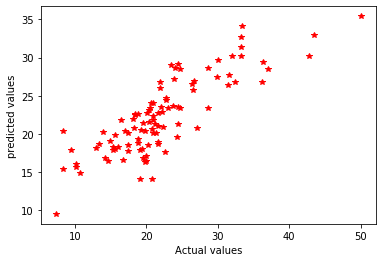

In [13]:
#We store the predictions into a predictoins list
predictions=[]
for pred in estimator.predict(input_fn=lambda: predict_fn(test)):
    predictions.append(np.array(pred['predictions']).astype(float))
    
plt.plot(test_y, predictions, 'r*')
plt.xlabel('Actual values')
plt.ylabel('predicted values')
plt.show()

In [14]:
#calculating the rmse (root mean squared error)
np.sqrt(mean_squared_error(test_y, predictions))**0.5

2.0830405865836226

In [15]:
#%tensorboard --logdir=boston
#Alternative you can also access this from localhost:6006 on your browser

In [16]:
#Uncomment the below line to kill the tensorboard server. The syntax is taskkill /F /PID proc_num
#If you still get an error and the tensorboard is not displaying you can restart your jupyter/conda
# !taskkill /F /PID 14728
# !taskkill /im tensorboard.exe /f
# !del /q %TMP%\.tensorboard-info\*